In [1]:
# 顯示圖片
from IPython.display import Image
%matplotlib inline

# 特徵標準化

徵標準化(normalization)



##### 什麼是特徵標準化？


特徵標準化(normalization)是將特徵資料按比例縮放，讓資料落在某一特定的區間。

##### 為什麼要標準化？


提高精準度

##### 特徵標準化怎麼做？

- min max normalization：
 - 會將特徵數據按比例縮放到 0~1 的區間，（或是-1到1）。
- standard deviation normalization：
 - 會將所有特徵數據縮放成平均為 0 、平方差為 1 。

In [2]:
# 標準化前後比較
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# datasetset 功能: 去load資料 & 模擬資料

from sklearn.model_selection import train_test_split 
# 用make_classification用來產生隨機的訓練資料
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC

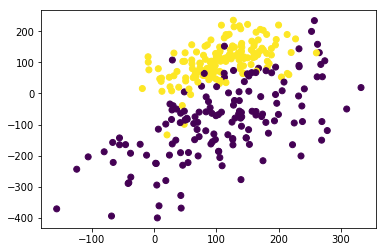

In [46]:
X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,
                          random_state=0,scale=100,n_clusters_per_class=1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
clf.score(X_test,y_test)

0.5333333333333333

In [7]:
# 標準化：
# 使用preprocessing.scale()標準化X
X = preprocessing.scale(X)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
clf.score(X_test,y_test)

0.9833333333333333

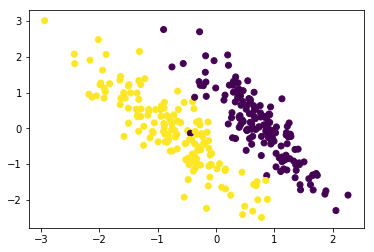

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

因為標準化可以幫助機器學習訓練的時候有更好的資料結構，進而提高資料的準確度。

# 評估方法

### accuracy_score
- 準確率分數是指所有正確的百分比
- 比較容易理解
- 無法顯示分佈與分類器犯錯的類型  (只有數值  沒有細節)

In [11]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3, 2, 1,0]
y_true = [0, 1, 2, 3, 1, 1,0]

In [12]:
accuracy_score(y_true, y_pred)

0.5714285714285714

In [13]:
accuracy_score(y_true, y_pred, normalize=False)
# 非常態分佈狀態下==>normalize=False==>顯示正確的個數

4

##### 實戰: 乳癌資料集

In [14]:
# import datasets, numpy
from sklearn import datasets
import numpy as np

In [15]:
# 從datasets 載入 breast_cancer 資料集

breast_cancer = datasets.load_breast_cancer()

In [16]:
# 查看一下 breast_cancer
# 分出X y
X = breast_cancer.data #feature, 不是.date()
y = breast_cancer.target #label , 不是.target()

In [17]:
# 切訓練測試集

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=88)

In [18]:
X_train

array([[1.955e+01, 2.321e+01, 1.289e+02, ..., 1.825e-01, 2.576e-01,
        7.602e-02],
       [1.669e+01, 2.020e+01, 1.071e+02, ..., 8.737e-02, 4.677e-01,
        7.623e-02],
       [1.499e+01, 2.520e+01, 9.554e+01, ..., 2.899e-02, 1.565e-01,
        5.504e-02],
       ...,
       [1.276e+01, 1.884e+01, 8.187e+01, ..., 8.312e-02, 2.744e-01,
        7.238e-02],
       [1.882e+01, 2.197e+01, 1.237e+02, ..., 1.708e-01, 3.007e-01,
        8.314e-02],
       [1.126e+01, 1.996e+01, 7.372e+01, ..., 9.314e-02, 2.955e-01,
        7.009e-02]])

In [19]:
# 標準化 StandardScaler
# .fit() ==> .transform() 兩步驟
# 合併成 .fit_transform() 一步驟
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) #fit_transform
X_test_std = stdsc.fit_transform(X_test) #fit_transform

In [20]:
X_test_std

array([[-1.29399122, -1.41232931, -1.17111686, ..., -0.10281326,
        -0.10248539,  2.68021524],
       [ 0.88496351,  0.5393433 ,  0.87399948, ...,  1.02947712,
        -0.47741413, -0.3795286 ],
       [-1.27451519, -0.78411917, -1.28349532, ..., -0.94465308,
        -0.11414984, -0.08778676],
       ...,
       [ 0.20625334, -1.01504226,  0.14782876, ...,  0.16219088,
         0.33243194, -0.0817088 ],
       [ 1.47809718,  1.48538308,  1.5817264 , ...,  2.03227684,
         2.93360422,  1.02903747],
       [-0.1035926 , -0.03672291, -0.11553143, ...,  0.21187915,
        -0.10081904,  0.34577403]])

In [21]:
# 正規劃 normalization


from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_nor = mms.fit_transform(X_train) #fit_transform
X_test_nor = mms.fit_transform(X_test) #fit_transform

In [22]:
X_test_nor

array([[0.07779647, 0.11862745, 0.09517601, ..., 0.39005806, 0.37704918,
        0.52214531],
       [0.46593776, 0.50392157, 0.46084822, ..., 0.66291727, 0.30611602,
        0.11613684],
       [0.08126577, 0.24264706, 0.07508244, ..., 0.18719158, 0.37484237,
        0.15484912],
       ...,
       [0.34503785, 0.19705882, 0.33100698, ..., 0.45391872, 0.45933165,
        0.15565562],
       [0.57159378, 0.69068627, 0.58739167, ..., 0.90457184, 0.95145019,
        0.30304456],
       [0.28984441, 0.39019608, 0.28391748, ..., 0.4658926 , 0.37736444,
        0.21237986]])

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)


In [24]:
print(y_pred)
print(y_test)

[1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1]
[1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1]


In [25]:
import numpy as np
from sklearn.metrics import accuracy_score   #算分數
accuracy_score(y_pred,y_test)

0.9824561403508771

In [26]:
## Reading a confusion matrix


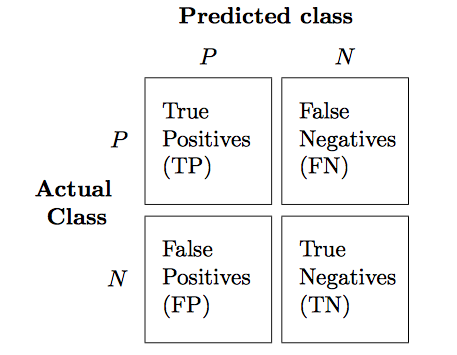

In [27]:
Image(filename='./images/06_08.png', width=300) 

- ACC = 1 - ERR = (TP+TN) / (TP+TN+FP+FN)
- PRE(precision) = TP/(TP+FP)  ==>醫生角度
- REC(recall) = TP/(TP+FN)  ==>病患角度
- F1 = 2*PRE*REC / (PRE+REC)

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 57   0]
 [  3 111]]


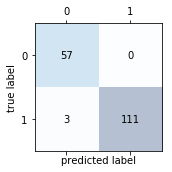

In [29]:
# 畫圖 true=1

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

### 算出 precision、recall、F1、accuracy_score

In [30]:
# metrics
# y_true=y_test, y_pred=y_pred ????
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision:\t %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall:\t\t %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1:\t\t %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('accuracy:\t %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Precision:	 1.000
Recall:		 0.974
F1:		 0.987
accuracy:	 0.982


# 交叉驗證(Cross validation)

##### 為什麼需要交叉驗證

為了避免依賴某一特定的訓練和測試資料產生偏差。
缺點: 浪費時間..

##### 交叉驗證怎麼做？

In [31]:
交叉驗證怎麼做？

SyntaxError: invalid character in identifier (<ipython-input-31-d5733ad58886>, line 1)

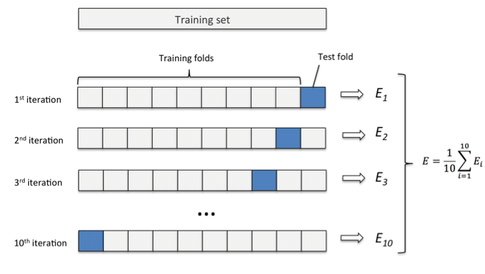

In [32]:
Image(filename='./images/10-fold.png', width=500) 

- 將資料分成10等份，
- 其中第1等分用來當作驗證的測試資料，其餘9份拿來訓練
- 輪流，總共做10次。
- 藉著將10次的準確性(Accuracy)平均，而這個得到的平均值

In [33]:
# import

In [34]:
from sklearn.model_selection import cross_val_score
#交叉驗證

In [35]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# 讀 iris 資料集

In [37]:
iris = datasets.load_iris() #載入sklearn的iris資料
iris_X = iris.data # 屬性 feature
iris_y = iris.target #預測的目標 label

In [38]:
# knn

In [39]:
#knn=KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=10)  # n_neighbors=10 ==>找鄰近10點, 由user 自訂

In [40]:
# cross_val_score

In [41]:
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')  # cv=5 ==>切5等分
print(scores)
print(scores.mean())

[0.87826087 0.93913043 0.94690265 0.95575221 0.9380531 ]
0.9316198537899192


In [42]:
# 改變n_neighbors
k_range = range(1,31)
k_scores = []
for k_number in k_range:  #neighbors : 1~30 測試
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

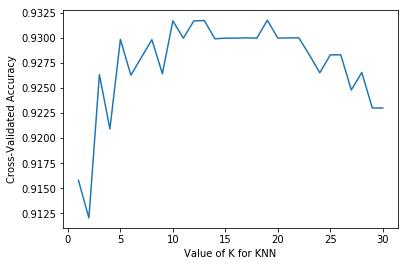

In [43]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

- 不同的n_neighbors會有不同的準確度
 - 中間取間的k數量是最好的
- 而到後面則有下降的趨勢==>Overfitting 過度擬合